In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_drinking = "D:/AI Datasets/Human Action/DATA/train/drinking"
train_eating = "D:/AI Datasets/Human Action/DATA/train/eating"
train_laughing = "D:/AI Datasets/Human Action/DATA/train/laughing"
train_sleeping = "D:/AI Datasets/Human Action/DATA/train/sleeping"

test_drinking = "D:/AI Datasets/Human Action/DATA/test/drinking"
test_eating = "D:/AI Datasets/Human Action/DATA/test/eating"
test_laughing = "D:/AI Datasets/Human Action/DATA/test/laughing"
test_sleeping = "D:/AI Datasets/Human Action/DATA/test/sleeping"


print("Number of drinking images in training set", total_files(train_drinking))
print("Number of eating images in training set", total_files(train_eating))
print("Number of laughing images in training set", total_files(train_laughing))
print("Number of sleeping images in training set", total_files(train_sleeping))

print("========================================================")

print("Number of drinking images in testing set", total_files(test_drinking))
print("Number of eating images in testing set", total_files(test_eating))
print("Number of laughing images in testing set", total_files(test_laughing))
print("Number of sleeping images in testing set", total_files(test_sleeping))

Number of drinking images in training set 1000
Number of eating images in training set 1000
Number of laughing images in training set 1000
Number of sleeping images in training set 1000
Number of drinking images in testing set 200
Number of eating images in testing set 200
Number of laughing images in testing set 200
Number of sleeping images in testing set 200


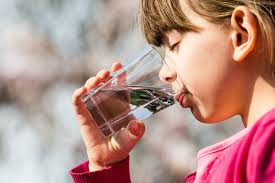

In [3]:
from PIL import Image
import IPython.display as display

image_path = "D:/AI Datasets/Human Action/DATA/train/drinking/images_122 (2).jpg"

with open(image_path, "rb") as f:
    display.display(display.Image(data=f.read(), width=500))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('D:/AI Datasets/Human Action/DATA/train', target_size=(160, 160), batch_size=16, class_mode='categorical', shuffle=True)

test_generator = test_datagen.flow_from_directory('D:/AI Datasets/Human Action/DATA/test', target_size=(160, 160), batch_size=16, class_mode='categorical' , shuffle=False)

Found 4000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [5]:
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.metrics import Precision, Recall

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
for layer in vgg19_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg19_base)
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [6]:
model.build(input_shape=(None, 160, 160, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 2048)              26216448  
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 50,445,380
Trainable params: 30,420,996
Non-trainable params: 20,024,384
_________________________________________________________________


In [7]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20
                    )

Epoch 1/20
250/250 [==============================] - 48s 162ms/step - loss: 1.0157 - accuracy: 0.6780 - precision: 0.7322 - recall: 0.5987
Epoch 2/20
250/250 [==============================] - 21s 85ms/step - loss: 0.5874 - accuracy: 0.7705 - precision: 0.8175 - recall: 0.7268
Epoch 3/20
250/250 [==============================] - 22s 86ms/step - loss: 0.4983 - accuracy: 0.8158 - precision: 0.8487 - recall: 0.7688
Epoch 4/20
250/250 [==============================] - 23s 91ms/step - loss: 0.4746 - accuracy: 0.8207 - precision: 0.8519 - recall: 0.7897
Epoch 5/20
250/250 [==============================] - 22s 87ms/step - loss: 0.4287 - accuracy: 0.8385 - precision: 0.8684 - recall: 0.8052
Epoch 6/20
250/250 [==============================] - 21s 86ms/step - loss: 0.3924 - accuracy: 0.8550 - precision: 0.8810 - recall: 0.8292
Epoch 7/20
250/250 [==============================] - 22s 87ms/step - loss: 0.3628 - accuracy: 0.8602 - precision: 0.8815 - recall: 0.8372
Epoch 8/20
250/250 [======

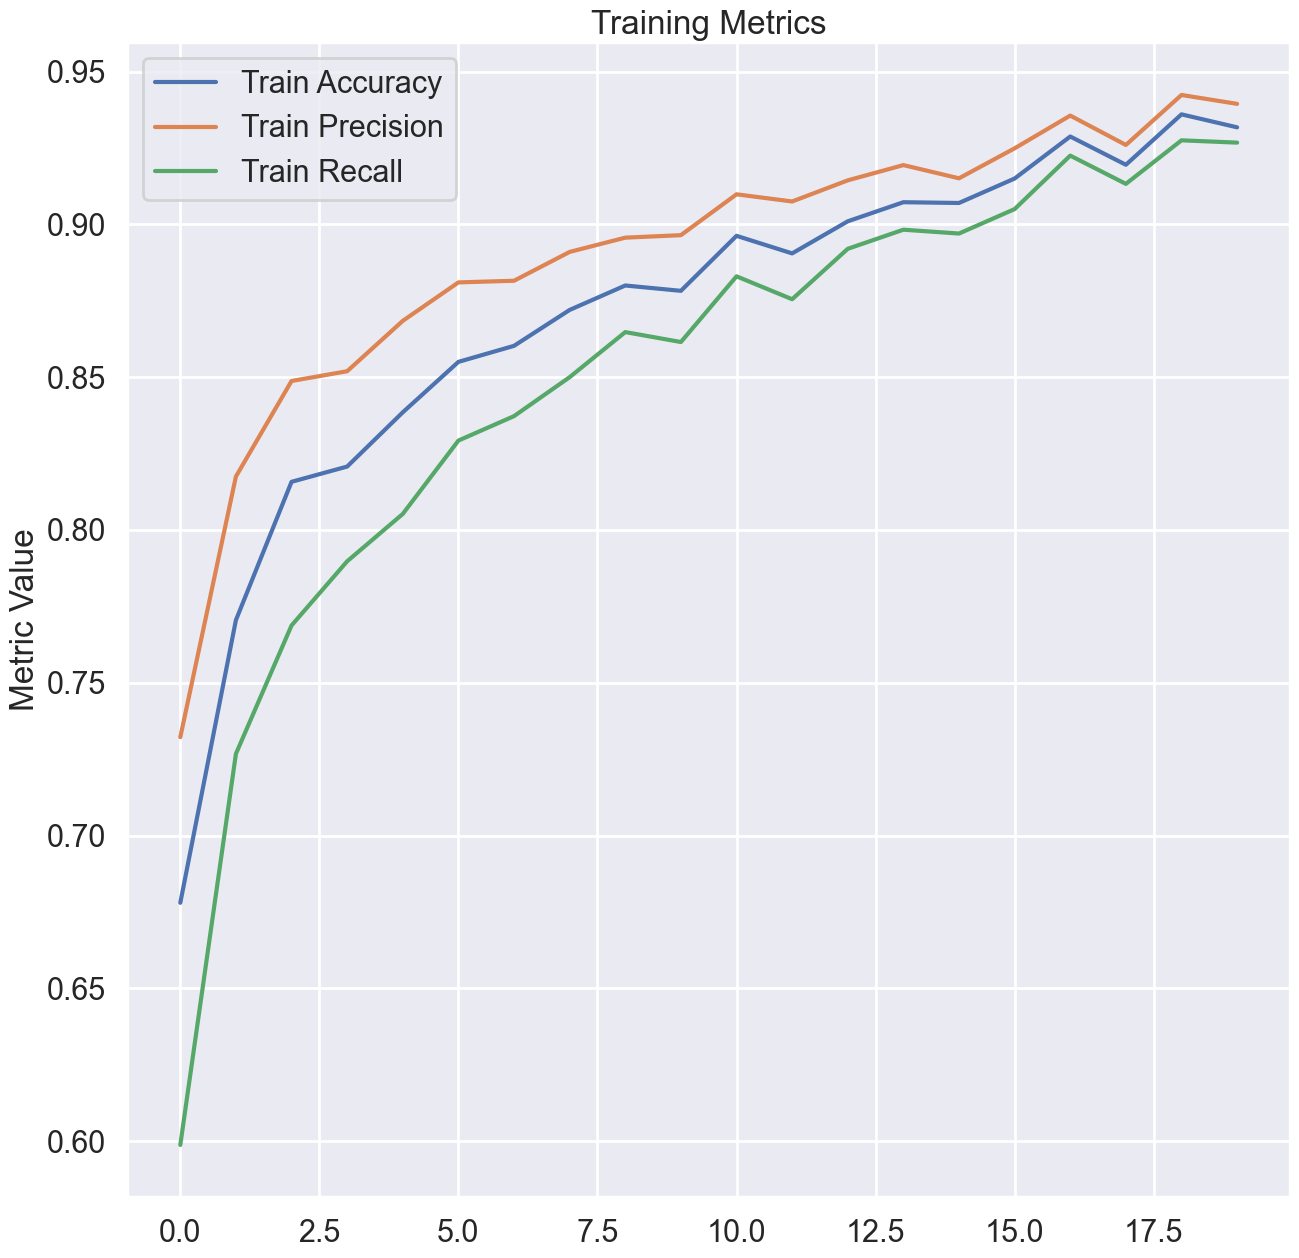

In [8]:
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

plt.figure(figsize=(15, 15))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['recall'], label='Train Recall')
plt.title('Training Metrics')
plt.ylabel('Metric Value')
plt.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import classification_report

test_results = model.evaluate(test_generator)
test_predictions = model.predict(test_generator)
true_labels = test_generator.labels

report = classification_report(true_labels, test_predictions.argmax(axis=1), digits=5)

50/50 [==============================] - 4s 77ms/step


In [10]:
print(report)

              precision    recall  f1-score   support

           0    0.75740   0.64000   0.69377       200
           1    0.67376   0.95000   0.78838       200
           2    0.78325   0.79500   0.78908       200
           3    0.93836   0.68500   0.79191       200

    accuracy                        0.76750       800
   macro avg    0.78819   0.76750   0.76578       800
weighted avg    0.78819   0.76750   0.76578       800



In [ ]:
model.save("vgg19.h5")

In [12]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'drinking', 1: 'eating', 2: 'laughing', 3: 'sleeping'}


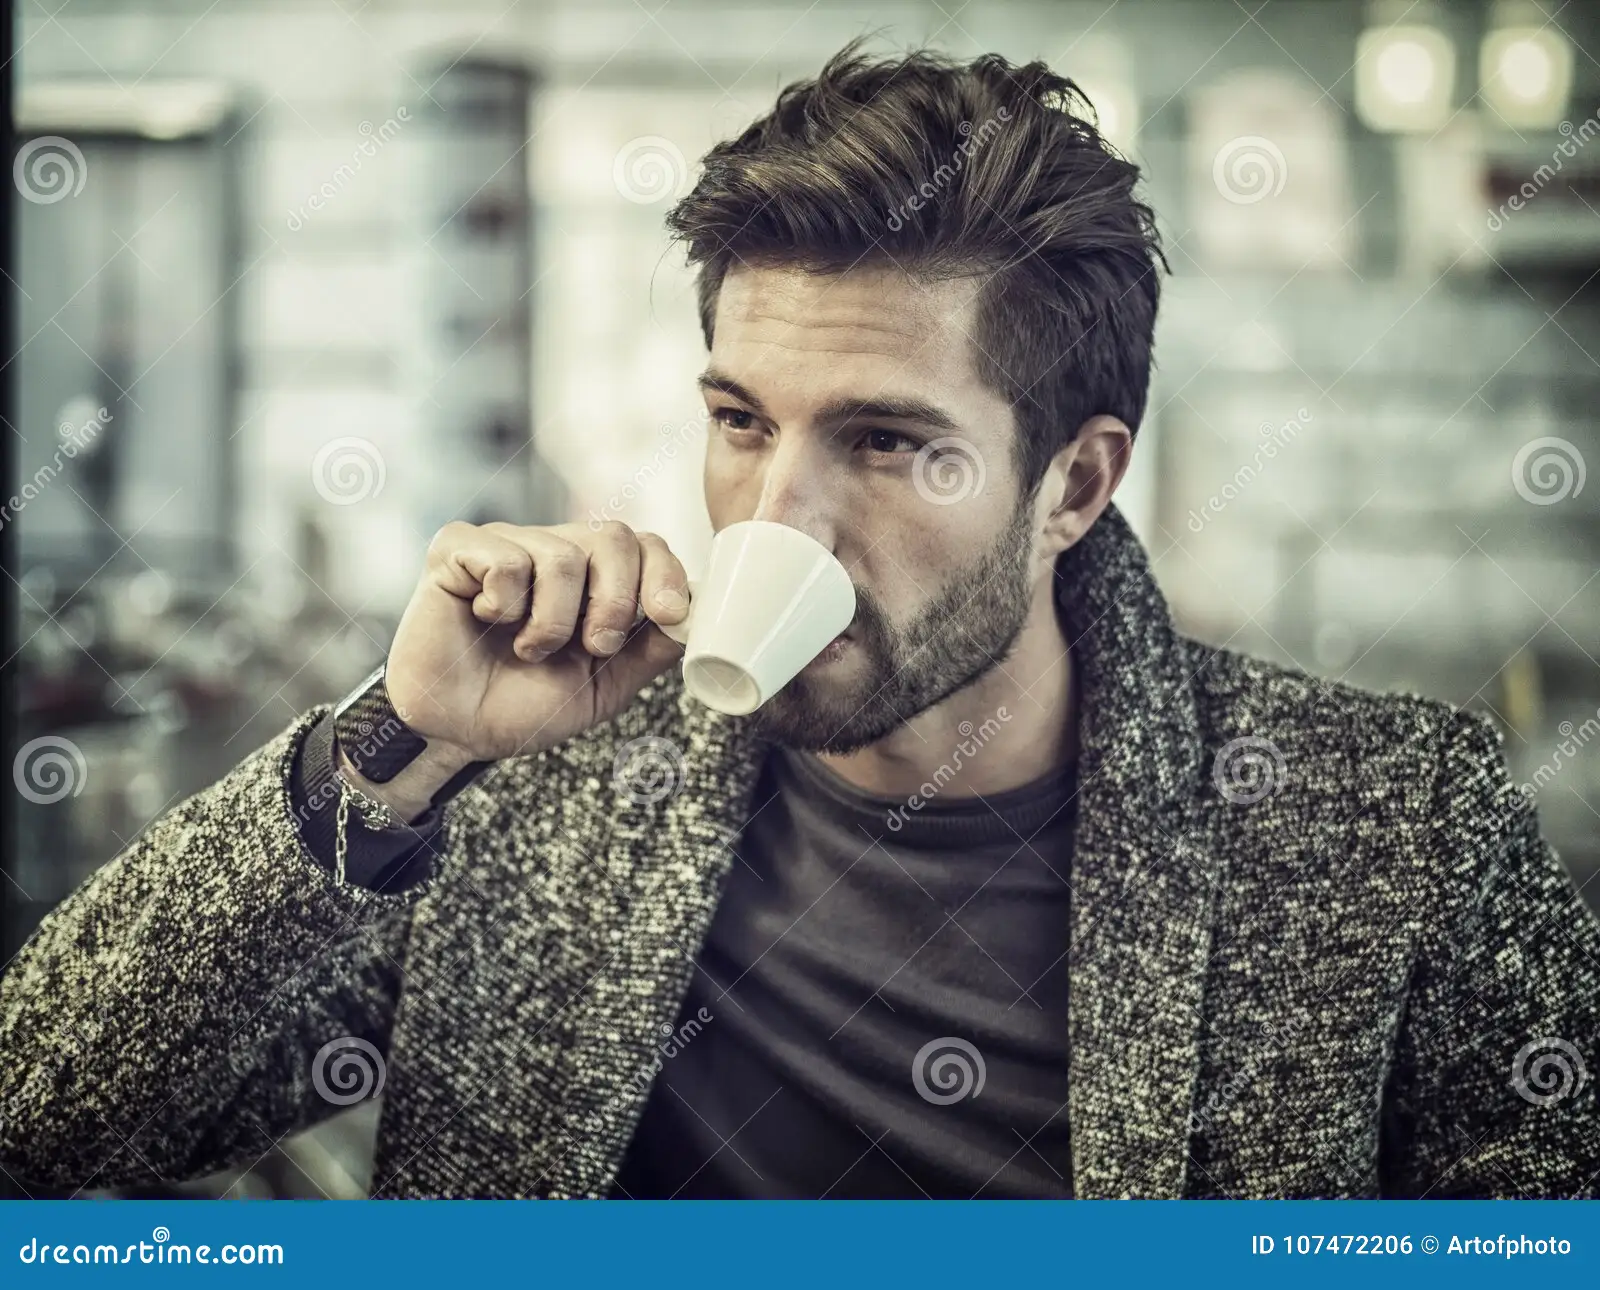

In [13]:
image_test = "D:/Downloads/attractive-man-drinking-coffee-attractive-man-drinking-coffee-sitting-bar-serious-expression-107472206.webp"

with open(image_test, "rb") as f:
    display.display(display.Image(data=f.read(), width=500))

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(160, 160)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(image_test)

prediction = model.predict(x)
print(prediction)
print(f'Class: {labels[np.argmax(prediction)]}')

1/1 [==============================] - 1s 1s/step
[[9.9407589e-01 1.3665759e-05 5.8331322e-03 7.7365636e-05]]
Class: drinking
